# Lesson 3 Exercise 1: Three Queries Three Tables
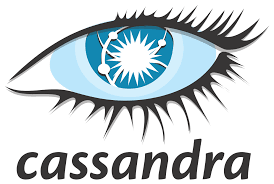

### Walk through the basics of creating a table in Apache Cassandra, inserting rows of data, and doing a simple CQL query to validate the information. You will practice Denormalization, and the concept of 1 table per query, which is an encouraged practice with Apache Cassandra. 

### Remember, replace ##### with your answer.


Note: __Do not__ click the blue Preview button at the bottom

#### We will use a python wrapper/ python driver called cassandra to run the Apache Cassandra queries. This library should be preinstalled but in the future to install this library you can run this command in a notebook to install locally: 
! pip install cassandra-driver
#### More documentation can be found here:  https://datastax.github.io/python-driver/

#### Import Apache Cassandra python package

In [27]:
import cassandra

### Create a connection to the database

In [28]:
from cassandra.cluster import Cluster
try: 
    cluster = Cluster(['127.0.0.1']) #If you have a locally installed Apache Cassandra instance
    session = cluster.connect()
except Exception as e:
    print(e)

### Create a keyspace to work in

In [29]:
try:
    session.execute("""
    CREATE KEYSPACE IF NOT EXISTS udacity 
    WITH REPLICATION = 
    { 'class' : 'SimpleStrategy', 'replication_factor' : 1 }"""
)

except Exception as e:
    print(e)

#### Connect to our Keyspace. Compare this to how we had to create a new session in PostgreSQL.  

In [30]:
try:
    session.set_keyspace('udacity')
except Exception as e:
    print(e)

### Let's imagine we would like to start creating a Music Library of albums. 

### We want to ask 3 questions of the data
#### 1. Give every album in the music library that was released in a given year
`select * from music_library WHERE YEAR=1970`
#### 2. Give every album in the music library that was created by a given artist  
`select * from artist_library WHERE artist_name="The Beatles"`
#### 3. Give all the information from the music library about a given album
`select * from album_library WHERE album_name="Close To You"`


### Because we want to do three different queries, we will need different tables that partition the data differently. 

```
Year    |  Artist_name     | Album_Name
1965       The Beatles      Rubber soul
1965       The Beatles      My generation


Artist_name    |  Album_Name     | Year
The Beatles       Rubber soul      1965
The Beatles       My generation    1965


Album_Name    |  Artist_name     | Year
Rubber soul       The Beatles      1965
My generation       The Beatles      1965
```



### TO-DO: Create the tables. 

In [31]:
create_query = "CREATE TABLE IF NOT EXISTS "
query = create_query + "music_library (year int, artist_name text, album_name text, PRIMARY KEY (year, artist_name))"
try:
    session.execute(query)
except Exception as e:
    print(e)
    
query1 = create_query + "artist_library (artist_name text, album_name text, year int, PRIMARY KEY (artist_name, album_name))"
try:
    session.execute(query1)
except Exception as e:
    print(e)

query2 = create_query + "album_library (album_name text, artist_name text, year int, PRIMARY KEY (album_name, artist_name))"
try:
    session.execute(query2)
except Exception as e:
    print(e)

### TO-DO: Insert data into the tables

In [32]:
query = "INSERT INTO music_library (year, artist_name, album_name)"
query = query + " VALUES (%s, %s, %s)"

query1 = "INSERT INTO artist_library (artist_name, album_name, year)"
query1 = query1 + " VALUES (%s, %s, %s)"

query2 = "INSERT INTO album_library (album_name, artist_name, year)"
query2 = query2 + " VALUES (%s, %s, %s)"

try:
    session.execute(query, (1970, "The Beatles", "Let it Be"))
except Exception as e:
    print(e)

try:
    session.execute(query, (1965, "The Beatles", "Rubber Soul"))
except Exception as e:
    print(e)
 
try:
    session.execute(query, (1965, "The Who", "My Generation"))
except Exception as e:
    print(e)

try:
    session.execute(query, (1966, "The Monkees", "The Monkees"))
except Exception as e:
    print(e)

try:
    session.execute(query, (1970, "The Carpenters", "Close To You"))
except Exception as e:
    print(e)
    
try:
    session.execute(query1, ("The Beatles", "Let it Be", 1970))
except Exception as e:
    print(e)
    
try:
    session.execute(query1, ("The Beatles", "Rubber Soul", 1965))
except Exception as e:
    print(e)
    
try:
    session.execute(query1, ("The Who", "My Generation", 1965))
except Exception as e:
    print(e)

try:
    session.execute(query1, ("The Monkees", "The Monkees", 1966))
except Exception as e:
    print(e)

try:
    session.execute(query1, ("The Carpenters", "Close To You",1970))
except Exception as e:
    print(e)
    
try:
    session.execute(query2, ("Let it Be", "The Beatles", 1970))
except Exception as e:
    print(e)
    
try:
    session.execute(query2, ("Rubber Soul", "The Beatles", 1965))
except Exception as e:
    print(e)
    
try:
    session.execute(query2, ("My Generation", "The Who", 1965))
except Exception as e:
    print(e)

try:
    session.execute(query2, ("The Monkees", "The Monkees", 1966))
except Exception as e:
    print(e)

try:
    session.execute(query2, ("Close To You", "The Carpenters", 1970))
except Exception as e:
    print(e)

This might have felt unnatural to insert duplicate data into the tables. If I just normalized these tables, I wouldn't have to have extra copies! While this is true, remember there are no `JOINS` in Apache Cassandra. For the benefit of high availibity and scalabity, denormalization must be how this is done. 


### TO-DO: Validate the Data Model

In [33]:
query = "SELECT * FROM music_library WHERE YEAR=1970"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.year, row.artist_name, row.album_name)

1970 The Beatles Let it Be
1970 The Carpenters Close To You


### Your output should be:
1970 The Beatles Let it Be<br>
1970 The Carpenters Close To You

### TO-DO: Validate the Data Model

In [34]:
query = "select * from artist_library WHERE artist_name='The Beatles'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.artist_name, row.album_name, row.year)

The Beatles Let it Be 1970
The Beatles Rubber Soul 1965


### Your output should be:
The Beatles Rubber Soul 1965 <br>
The Beatles Let it Be 1970 

### TO-DO: Validate the Data Model

In [36]:
query = "select * from album_library WHERE album_name='Close To You'"
try:
    rows = session.execute(query)
except Exception as e:
    print(e)
    
for row in rows:
    print (row.artist_name, row.year, row.album_name)

The Carpenters 1970 Close To You


### Your output should be:
The Carpenters 1970 Close To You

In [37]:
query = "DROP TABLE music_library"
try:
    session.execute(query)
except Exception as e:
    print(e)
    
query = "DROP TABLE album_library"
try:
    session.execute(query)
except Exception as e:
    print(e)

query = "DROP TABLE artist_library"
try:
    session.execute(query)
except Exception as e:
    print(e)


### And finally close the session and cluster connection

In [38]:
session.shutdown()
cluster.shutdown()